Importing needed libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
#loading data 
gold_data=pd.read_csv("/content/gld_price_data.csv")

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
 #Getting statistical information of the data 
 gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Determine correlation between features

1- Positive Correlation 

2- Negative Correlation 

In [9]:
correlation =gold_data.corr()

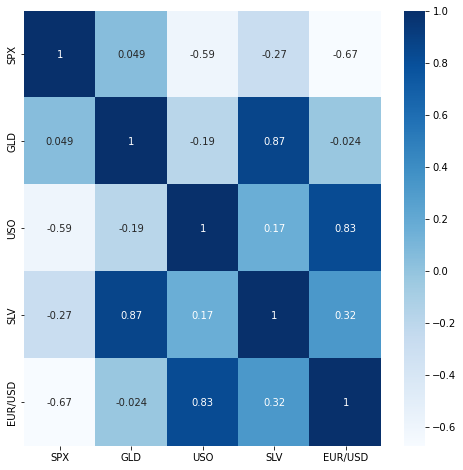

In [21]:
#Constructing a heatmap to better understand correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True,cmap='Blues')

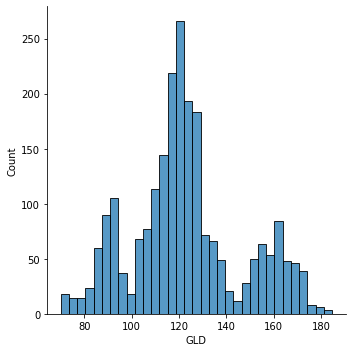

In [22]:
#checking the distribution of gold price 
sns.displot(gold_data['GLD'])

In [23]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [24]:
#Splitting data into test and training set 
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.2,random_state=2)

Training Model :

model 1 : random Forest Regressor 

model 2 : linear regression 



In [26]:
model1 = RandomForestRegressor(n_estimators=100)
model2 = LinearRegression()
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)

LinearRegression()

In [28]:
#Evaluation Models
test_data_prediction_model1 = model1.predict(X_test)
test_data_prediction_model2 = model2.predict(X_test)
#R squared error
error_score_model1 = metrics.r2_score(Y_test, test_data_prediction_model1)
print("R squared error with Random Forest Regressor Model: ", error_score_model1)
error_score_model2 = metrics.r2_score(Y_test, test_data_prediction_model2)
print("R squared error with Linear Regression Model: ", error_score_model2)

R squared error with Random Forest Regressor Model:  0.9759272206318088
R squared error with Linear Regression Model:  0.8799745494892806


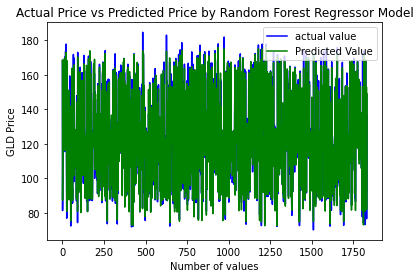

In [29]:
#Compare the actual values and Predicted Values in a plot 
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='actual value')
plt.plot(test_data_prediction_model1, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price by Random Forest Regressor Model')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

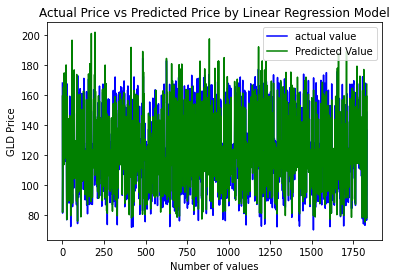

In [30]:
plt.plot(Y_test,color='blue',label='actual value')
plt.plot(test_data_prediction_model2, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price by Linear Regression Model')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()